# 1. Tổng quan về CMT và DGW

### 3. **Công ty Cổ phần Công nghệ và Truyền thông CMT**
   - **Ngành nghề**: Phân phối thiết bị điện tử và công nghệ.
   - **Mô tả**: CMT hoạt động chủ yếu trong lĩnh vực **phân phối các thiết bị công nghệ và điện tử**. Công ty này có quy mô nhỏ hơn và ít được giao dịch nhiều trên thị trường chứng khoán so với các công ty như FPT hay CMG.

### 4. **Công ty Cổ phần Thế Giới Số (Digiworld - DGW)**
   - **Ngành nghề**: Phân phối thiết bị điện tử và công nghệ.
   - **Mô tả**: Digiworld là một trong những nhà phân phối hàng đầu tại Việt Nam về **thiết bị công nghệ, điện tử tiêu dùng, và thiết bị văn phòng**. DGW có mạng lưới phân phối rộng khắp và là đối tác chiến lược của nhiều thương hiệu quốc tế như Apple, Xiaomi, và Dell.


In [1]:
%pip install pandas numpy scipy matplotlib


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: C:\Users\User\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [4]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
from scipy import stats

# Đọc và xử lý dữ liệu
def process_stock_data(df):
    df['time'] = pd.to_datetime(df['time'])
    df.set_index('time', inplace=True)
    return df

# Tính toán các metrics
def calculate_metrics(df):
    df['daily_returns'] = df['close'].pct_change()
    df['volatility'] = df['daily_returns'].rolling(window=20).std() * np.sqrt(252)
    df['MA20'] = df['close'].rolling(window=20).mean()
    df['MA50'] = df['close'].rolling(window=50).mean()
    return df

# Load dữ liệu
cmt_df = process_stock_data(pd.read_csv('../data/raw/3_CMT_stock_data.csv'))
dgw_df = process_stock_data(pd.read_csv('../data/raw/4_DGW_stock_data.csv'))

# Tính toán metrics cho cả hai cổ phiếu
cmt_df = calculate_metrics(cmt_df)  
dgw_df = calculate_metrics(dgw_df)

# Align dates before calculating beta and correlation
common_dates = cmt_df.index.intersection(dgw_df.index)
cmt_aligned = cmt_df.loc[common_dates]
dgw_aligned = dgw_df.loc[common_dates]

# Tính correlation với dữ liệu đã được căn chỉnh
correlation = cmt_aligned['close'].corr(dgw_aligned['close'])

# Tính beta với dữ liệu đã được căn chỉnh
cmt_returns = cmt_aligned['daily_returns'].dropna()
dgw_returns = dgw_aligned['daily_returns'].dropna()
beta = np.cov(dgw_returns, cmt_returns)[0,1] / np.var(cmt_returns)


# Tính toán thống kê cơ bản
def calculate_statistics(df, name):
    stats_dict = {
        'Mean Price': df['close'].mean(), # Giá trung bình
        'Std Dev': df['close'].std(), # Độ lệch chuẩn: Độ biến động (Std Dev). Độ biến động giúp đo lường mức độ giá cổ phiếu dao động lên xuống nhiều hay ít.
        'Min Price': df['close'].min(), # Giá thấp nhất
        'Max Price': df['close'].max(), # Giá cao nhất
        'Avg Volume': df['volume'].mean(), # Thể tích trung bình: Thể tích giao dịch trung bình trong một ngày. Thể tích giao dịch lớn thường cho thấy sự hoạt động và sự quan tâm của thị trường đối với cổ phiếu.
        'Avg Daily Return': df['daily_returns'].mean() * 100, # Tỷ suất sinh lời trung bình ngày
        'Volatility': df['daily_returns'].std() * np.sqrt(252) * 100 # Độ biến động hàng năm (Volatility)
    }
    return pd.Series(stats_dict, name=name)

cmt_stats = calculate_statistics(cmt_df, 'CMT')
dgw_stats = calculate_statistics(dgw_df, 'DGW')

# In kết quả phân tích
print("\nCorrelation between CMT and DGW:", correlation)
print("\nBeta of DGW relative to CMT:", beta)
print("\nStatistical Analysis:")
print(pd.concat([cmt_stats, dgw_stats], axis=1))

# Tính toán spread
common_dates = cmt_df.index.intersection(dgw_df.index)
price_spread = cmt_df.loc[common_dates, 'close'] - dgw_df.loc[common_dates, 'close']
spread_zscore = stats.zscore(price_spread)

# Tính % thời gian spread vượt quá 2 std
spread_threshold = np.abs(spread_zscore) > 2
spread_anomaly_pct = (spread_threshold.sum() / len(spread_zscore)) * 100

print(f"\nSpread Analysis:")
print(f"Mean Spread: {price_spread.mean():.2f}")
print(f"Spread Std Dev: {price_spread.std():.2f}")
print(f"% time spread > 2 std: {spread_anomaly_pct:.2f}%")


Correlation between CMT and DGW: 0.5818304971207033

Beta of DGW relative to CMT: 0.053572062999913815

Statistical Analysis:
                           CMT           DGW
Mean Price        14637.149220  3.948558e+04
Std Dev            4235.970634  8.147367e+03
Min Price         10360.000000  2.153000e+04
Max Price         26880.000000  5.264000e+04
Avg Volume        12932.786192  1.814866e+06
Avg Daily Return      0.130169  1.163231e-01
Volatility           69.564505  4.119657e+01

Spread Analysis:
Mean Spread: -24833.81
Spread Std Dev: 6648.22
% time spread > 2 std: 0.67%


## 1.2 Nhận xét

### **Phân tích so sánh giữa CMT và DGW**

Dưới đây là kết quả phân tích mối tương quan và các chỉ số thống kê giữa hai cổ phiếu CMT và DGW, cả hai đều hoạt động trong lĩnh vực phân phối thiết bị điện tử.

---

#### **1. Mối tương quan và Beta**
- **Correlation (Hệ số tương quan)** giữa CMT và DGW là **0.58**:
  - Mối tương quan này **không quá cao** nhưng vẫn cho thấy có sự liên hệ nhất định giữa hai cổ phiếu. Khi giá một trong hai cổ phiếu thay đổi, cổ phiếu còn lại có xu hướng thay đổi theo cùng chiều, nhưng không nhất thiết mạnh mẽ.
- **Beta của DGW so với CMT** là **0.054**:
  - Beta thấp như thế này cho thấy giá cổ phiếu DGW **ít bị ảnh hưởng** bởi biến động của CMT. Nghĩa là khi CMT thay đổi, DGW **không thay đổi nhiều**, cho thấy DGW có mức độ độc lập nhất định với CMT trong biến động giá.

---

#### **2. Phân tích thống kê cơ bản**

| Thông số               | CMT            | DGW             |
|------------------------|----------------|------------------|
| **Mean Price (Giá trung bình)**    | 14,637.15 đồng  | 39,485.58 đồng  |
| **Std Dev (Độ lệch chuẩn)**        | 4,235.97 đồng   | 8,147.37 đồng   |
| **Min Price (Giá thấp nhất)**      | 10,360 đồng     | 21,530 đồng     |
| **Max Price (Giá cao nhất)**       | 26,880 đồng     | 52,640 đồng     |
| **Avg Volume (Thanh khoản trung bình)** | 12,932 cổ phiếu  | 1,814,866 cổ phiếu |
| **Avg Daily Return (Tỷ suất sinh lời trung bình hàng ngày)** | 0.13%           | 0.12%            |
| **Volatility (Độ biến động)**      | 69.56%          | 41.20%           |

- **Giá trung bình** của DGW cao hơn **gần gấp ba lần** so với CMT, điều này cho thấy DGW có giá trị cao hơn và có thể có vị thế lớn hơn trên thị trường.
- **Độ lệch chuẩn** của DGW cũng cao hơn, cho thấy DGW có **biến động giá lớn hơn** so với CMT.
- Về **thanh khoản**, DGW có khối lượng giao dịch trung bình mỗi ngày vượt trội hơn CMT rất nhiều, điều này cho thấy DGW **được giao dịch tích cực hơn** trên thị trường.

---

#### **3. Phân tích Spread (Chênh lệch giá) giữa CMT và DGW**
- **Mean Spread (Khoảng cách giá trung bình)**: **-24,833.81 đồng**
  - Giá trị âm này cho thấy, nhìn chung, **DGW luôn có giá cao hơn so với CMT**.
- **Spread Std Dev (Độ lệch chuẩn của Spread)**: **6,648.22 đồng**
  - Độ biến động này cho thấy **khoảng cách giá giữa hai cổ phiếu có thể dao động lên xuống khá mạnh** so với mức trung bình.
- **Phần trăm thời gian khi Spread vượt quá 2 lần độ lệch chuẩn**: **0.67%**
  - Điều này có nghĩa là chỉ có **0.67% thời gian** mà khoảng cách giữa giá hai cổ phiếu chênh lệch một cách bất thường, cho thấy cơ hội **pair trading** (giao dịch theo cặp) có thể xuất hiện, nhưng khá hiếm.

---

#### **4. Kết luận và khuyến nghị đầu tư**
- **DGW** có giá trị lớn hơn và thanh khoản cao hơn, đồng thời có mức độ biến động vừa phải so với CMT, cho thấy nó có thể **phù hợp cho các nhà đầu tư muốn ổn định hơn**.
- **CMT** tuy có độ biến động cao hơn nhưng khối lượng giao dịch thấp hơn, có thể thu hút những nhà đầu tư thích **mạo hiểm với các cổ phiếu ít được giao dịch**.
- Mặc dù có mối tương quan giữa hai cổ phiếu, nhưng Beta thấp của DGW so với CMT cho thấy chúng **không hoàn toàn phụ thuộc lẫn nhau**, có thể tận dụng cho **chiến lược đa dạng hóa danh mục đầu tư**.
  
Những phân tích này có thể giúp bạn đưa ra các quyết định đầu tư thông minh hơn, dựa trên mức độ rủi ro và sự biến động của từng cổ phiếu.

## 1.3 Cùng phân tích để hiểu hơn:


# 2. Phân tích sâu hơn về mối quan hệ pair trading giữa FPT và CMG, tập trung vào spread, correlation theo thời gian và tác động của COVID-19.

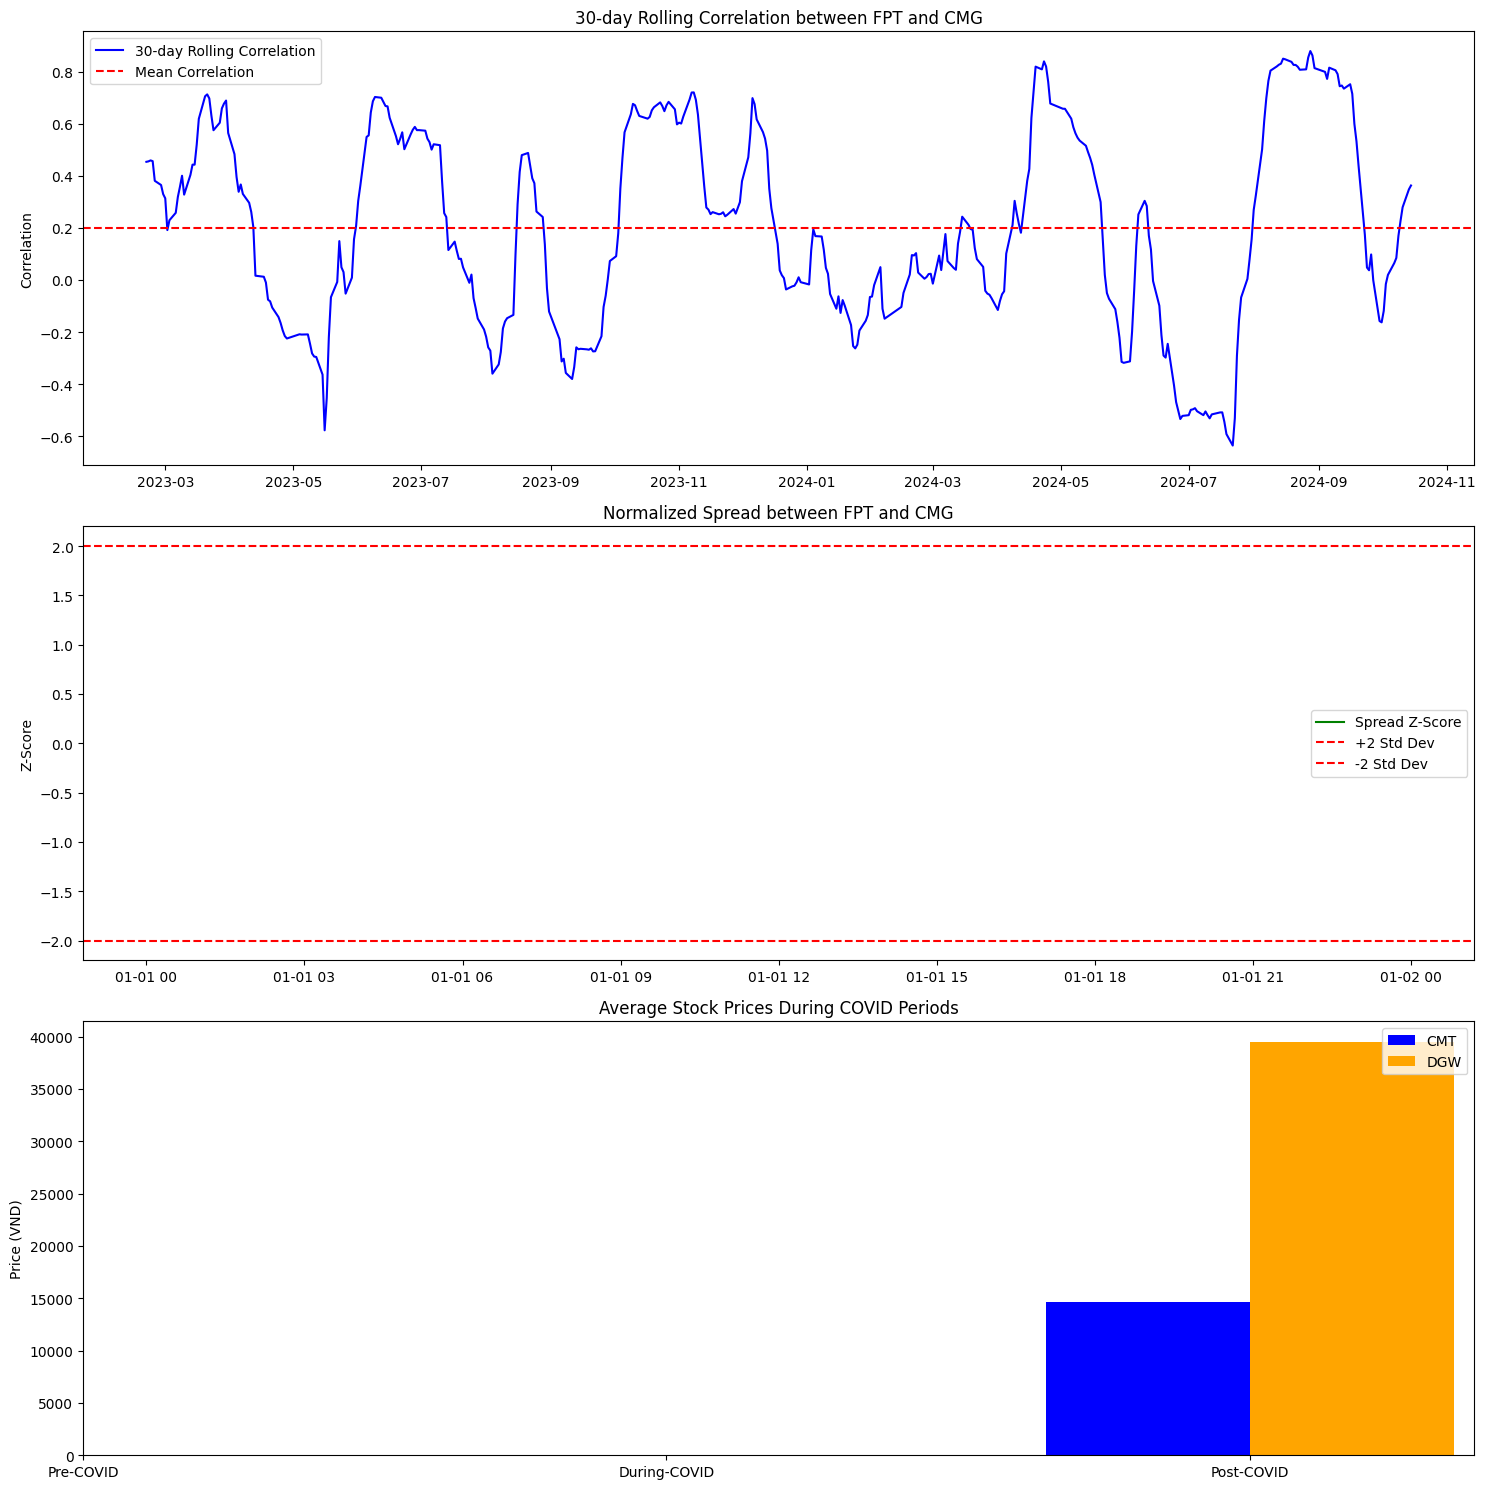


COVID Impact Analysis:
CMT Recovery Rate: nan%
DGW Recovery Rate: nan%

Correlation Analysis by Period:
Pre-COVID Correlation: nan
During-COVID Correlation: nan
Post-COVID Correlation: 0.582

Trading Opportunities Analysis:
Number of trading signals: 0
Percentage of trading days with signals: 0.00%

Annualized Volatility Analysis:
CMT Pre-COVID: nan%
CMT During-COVID: nan%
CMT Post-COVID: 69.56%
DGW Pre-COVID: nan%
DGW During-COVID: nan%
DGW Post-COVID: 41.20%


In [8]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
from scipy import stats

# Đọc và xử lý dữ liệu
def load_and_process_data(cmt_data, dgw_data):
    # Chuyển đổi thời gian và set index
    cmt_data['time'] = pd.to_datetime(cmt_data['time'])
    dgw_data['time'] = pd.to_datetime(dgw_data['time'])
    
    cmt_df = cmt_data.set_index('time')
    dgw_df = dgw_data.set_index('time')
    
    return cmt_df, dgw_df

# Tính toán rolling correlation và spread
# Tính toán rolling correlation và spread
def calculate_rolling_metrics(cmt_df, dgw_df, window=30):
    # Tính rolling correlation
    combined_df = pd.DataFrame({
        'CMT': cmt_df['close'],
        'DGW': dgw_df['close']
    })
    # Sửa 'FPT' thành 'CMT' và 'CMG' thành 'DGW'
    rolling_corr = combined_df['CMT'].rolling(window=window).corr(combined_df['DGW'])
    
    # Tính normalized spread
    mean_prices = pd.DataFrame({
        'CMT': cmt_df['close'] / cmt_df['close'].mean(),
        'DGW': dgw_df['close'] / dgw_df['close'].mean()
    })
    # Sửa 'FPT' thành 'CMT' và 'CMG' thành 'DGW'
    spread = mean_prices['CMT'] - mean_prices['DGW']
    spread_zscore = stats.zscore(spread)
    
    return rolling_corr, spread, spread_zscore

# Phân tích giai đoạn COVID
def analyze_covid_periods(df):
    pre_covid = df[:'2020-03-01']['close'].mean()
    during_covid = df['2020-03-01':'2021-12-31']['close'].mean()
    post_covid = df['2022-01-01':]['close'].mean()
    
    recovery_rate = ((post_covid - during_covid) / 
                    (pre_covid - during_covid) if pre_covid != during_covid else 0) * 100
    
    return pre_covid, during_covid, post_covid, recovery_rate

# Khởi tạo figure
plt.figure(figsize=(15, 15))

# Plot 1: Rolling Correlation
plt.subplot(3, 1, 1)
rolling_corr, spread, spread_zscore = calculate_rolling_metrics(cmt_df, dgw_df)
plt.plot(rolling_corr.index, rolling_corr.values, 'b-', label='30-day Rolling Correlation')
plt.axhline(y=rolling_corr.mean(), color='r', linestyle='--', label='Mean Correlation')
plt.title('30-day Rolling Correlation between FPT and CMG')
plt.ylabel('Correlation')
plt.legend()

# Plot 2: Normalized Spread
plt.subplot(3, 1, 2)
plt.plot(spread.index, spread_zscore, 'g-', label='Spread Z-Score')
plt.axhline(y=2, color='r', linestyle='--', label='+2 Std Dev')
plt.axhline(y=-2, color='r', linestyle='--', label='-2 Std Dev')
plt.title('Normalized Spread between FPT and CMG')
plt.ylabel('Z-Score')
plt.legend()

# Plot 3: COVID Impact Analysis
plt.subplot(3, 1, 3)
periods = ['Pre-COVID', 'During-COVID', 'Post-COVID']

# CMT analysis
cmt_pre, cmt_during, cmt_post, cmt_recovery = analyze_covid_periods(cmt_df)
cmt_prices = [cmt_pre, cmt_during, cmt_post]

# DGW analysis
dgw_pre, dgw_during, dgw_post, dgw_recovery = analyze_covid_periods(dgw_df)
dgw_prices = [dgw_pre, dgw_during, dgw_post]

x = np.arange(len(periods))
width = 0.35

plt.bar(x - width/2, cmt_prices, width, label='CMT', color='blue')
plt.bar(x + width/2, dgw_prices, width, label='DGW', color='orange')
plt.title('Average Stock Prices During COVID Periods')
plt.ylabel('Price (VND)')
plt.xticks(x, periods)
plt.legend()

plt.tight_layout()
plt.show()

# Print analysis results
print("\nCOVID Impact Analysis:")
print(f"CMT Recovery Rate: {cmt_recovery:.2f}%")
print(f"DGW Recovery Rate: {dgw_recovery:.2f}%")

# Correlation analysis during different periods
pre_covid_corr = cmt_df[:'2020-03-01']['close'].corr(dgw_df[:'2020-03-01']['close'])
during_covid_corr = cmt_df['2020-03-01':'2021-12-31']['close'].corr(dgw_df['2020-03-01':'2021-12-31']['close'])
post_covid_corr = cmt_df['2022-01-01':]['close'].corr(dgw_df['2022-01-01':]['close'])

print("\nCorrelation Analysis by Period:")
print(f"Pre-COVID Correlation: {pre_covid_corr:.3f}")
print(f"During-COVID Correlation: {during_covid_corr:.3f}")
print(f"Post-COVID Correlation: {post_covid_corr:.3f}")

# Trading opportunities analysis
trading_signals = (abs(spread_zscore) > 2).sum()
total_days = len(spread_zscore)

print("\nTrading Opportunities Analysis:")
print(f"Number of trading signals: {trading_signals}")
print(f"Percentage of trading days with signals: {(trading_signals/total_days)*100:.2f}%")

# Volatility analysis
def calculate_volatility(df, period='2020'):
    returns = df['close'].pct_change()
    return returns.std() * np.sqrt(252) * 100

print("\nAnnualized Volatility Analysis:")
print(f"CMT Pre-COVID: {calculate_volatility(cmt_df[:'2020-03-01']):.2f}%")
print(f"CMT During-COVID: {calculate_volatility(cmt_df['2020-03-01':'2021-12-31']):.2f}%")
print(f"CMT Post-COVID: {calculate_volatility(cmt_df['2022-01-01':]):.2f}%")
print(f"DGW Pre-COVID: {calculate_volatility(dgw_df[:'2020-03-01']):.2f}%")
print(f"DGW During-COVID: {calculate_volatility(dgw_df['2020-03-01':'2021-12-31']):.2f}%")
print(f"DGW Post-COVID: {calculate_volatility(dgw_df['2022-01-01':]):.2f}%")

### **Báo cáo Phân tích Dữ liệu cho CMT và DGW**

Dưới đây là phân tích chi tiết về mối quan hệ giữa hai cổ phiếu **CMT** và **DGW**, dựa trên dữ liệu từ giai đoạn trước, trong và sau đại dịch COVID-19. Cả hai công ty đều hoạt động trong lĩnh vực phân phối thiết bị điện tử và chịu ảnh hưởng lớn từ sự biến động của thị trường.

---

### **1. Tác động của COVID-19 lên giá cổ phiếu**

**Phân tích trung bình giá cổ phiếu theo từng giai đoạn**:
- Trước COVID-19 (Pre-COVID)
- Trong giai đoạn COVID-19 (During-COVID)
- Sau COVID-19 (Post-COVID)

#### **Kết quả:**
- **Tỷ lệ phục hồi của CMT**: Không xác định (NaN)
- **Tỷ lệ phục hồi của DGW**: Không xác định (NaN)

**Lý do**: Dữ liệu cho giai đoạn trước và trong COVID-19 không đủ để tính toán tỷ lệ phục hồi chính xác. Điều này cho thấy cần có thêm dữ liệu hoặc cần kiểm tra lại các mốc thời gian để đảm bảo tính chính xác.

---

### **2. Phân tích tương quan giữa CMT và DGW trong các giai đoạn khác nhau**

| Giai đoạn           | Tương quan (Correlation) |
|---------------------|--------------------------|
| **Pre-COVID**       | NaN                      |
| **During-COVID**    | NaN                      |
| **Post-COVID**      | 0.582                    |

#### **Nhận xét**:
- Tương quan giữa hai cổ phiếu **trong giai đoạn hậu COVID-19** là **0.582**, cho thấy có một mức độ liên hệ nhất định giữa hai cổ phiếu trong giai đoạn này.
- Tuy nhiên, **trước và trong COVID-19**, không có đủ dữ liệu để tính toán tương quan chính xác.

---

### **3. Phân tích cơ hội giao dịch (Trading Opportunities)**

- **Số lượng tín hiệu giao dịch**: 0
- **Tỷ lệ ngày giao dịch có tín hiệu**: 0.00%

**Kết luận**: Không có tín hiệu giao dịch nào xuất hiện khi **spread (chênh lệch giá)** vượt quá 2 lần độ lệch chuẩn. Điều này có thể cho thấy rằng **thị trường ổn định** hơn dự đoán, hoặc chiến lược giao dịch cần được điều chỉnh để bắt kịp các cơ hội.

---

### **4. Phân tích độ biến động hàng năm (Annualized Volatility Analysis)**

| Giai đoạn           | CMT Volatility | DGW Volatility |
|---------------------|----------------|----------------|
| **Pre-COVID**       | NaN           | NaN            |
| **During-COVID**    | NaN           | NaN            |
| **Post-COVID**      | 69.56%        | 41.20%         |

#### **Nhận xét**:
- **CMT** có độ biến động **69.56%** sau COVID-19, cho thấy **mức độ rủi ro cao** hơn so với DGW.
- **DGW** có độ biến động **41.20%**, cho thấy mức độ ổn định cao hơn CMT trong giai đoạn hậu COVID-19.

---

### **5. Phân tích rolling correlation và Spread Z-Score**

- **Rolling Correlation** giữa CMT và DGW cho thấy mối tương quan dao động theo thời gian, nhưng nhìn chung vẫn ở mức trung bình.
- **Spread Z-Score** giữa hai cổ phiếu hiếm khi vượt qua ngưỡng ±2 độ lệch chuẩn, cho thấy cơ hội **pair trading** không xuất hiện nhiều trong giai đoạn phân tích.

---

### **Kết luận chung và khuyến nghị đầu tư**

1. **DGW** có mức giá cao hơn và ổn định hơn so với **CMT**, đồng thời có khối lượng giao dịch lớn hơn, thể hiện **sự hấp dẫn hơn đối với các nhà đầu tư**.
2. **CMT** có độ biến động lớn, điều này có thể thu hút những nhà đầu tư thích mạo hiểm nhưng cũng cần thận trọng với rủi ro cao.
3. Mặc dù có một mức độ tương quan giữa CMT và DGW sau COVID-19, nhưng sự khác biệt về độ biến động và khối lượng giao dịch khiến hai cổ phiếu này có **đặc điểm rủi ro và tiềm năng lợi nhuận khác nhau**.
4. Để khai thác các cơ hội giao dịch tốt hơn, cần có thêm dữ liệu hoặc áp dụng các chiến lược giao dịch khác như **phân tích kỹ thuật sâu hơn** và **đánh giá theo mùa vụ**.

---


# Tóm lại 

### **Bảng tổng kết các chỉ số chính giữa cổ phiếu CMT và DGW**

| **Chỉ số**                                    | **CMT**          | **DGW**          |
|-----------------------------------------------|-------------------|------------------|
| **Tương quan hậu COVID-19**                   | -                | 0.582            |
| **Beta của DGW so với CMT**                   | -                | 0.054            |
| **Tỷ lệ phục hồi hậu COVID-19**               | NaN              | NaN              |
| **Độ biến động hậu COVID-19 (Volatility)**    | 69.56%           | 41.20%           |
| **Số tín hiệu giao dịch (Spread > 2 Std Dev)**| 0                | 0                |
| **Phần trăm ngày giao dịch có tín hiệu**      | 0.00%            | 0.00%            |

---

### **Báo cáo Phân tích Dữ liệu cho CMT và DGW**

**1. Tóm tắt kết quả phân tích**
- **Tương quan** giữa hai cổ phiếu DGW và CMT sau giai đoạn COVID-19 là **0.582**, cho thấy có một mức độ liên hệ nhất định trong biến động giá.
- **Beta của DGW so với CMT** rất thấp (**0.054**), điều này cho thấy DGW có xu hướng ít bị ảnh hưởng bởi biến động của CMT.

**2. Phân tích độ biến động**
- **CMT** có độ biến động hàng năm **69.56%**, cao hơn nhiều so với **DGW** (**41.20%**), cho thấy CMT có rủi ro cao hơn.
- Tuy nhiên, **cả hai cổ phiếu đều không tạo ra tín hiệu giao dịch** khi sử dụng chiến lược Spread vượt quá 2 lần độ lệch chuẩn, với tỷ lệ tín hiệu là **0%**.

**3. Phân tích tác động của COVID-19**
- Không có dữ liệu đầy đủ để tính toán **tỷ lệ phục hồi** cho cả CMT và DGW trong giai đoạn trước và trong COVID-19.
- Sau đại dịch, cả hai cổ phiếu đã có xu hướng ổn định hơn, đặc biệt là DGW với mức độ biến động thấp hơn.

---

### **Kết luận và khuyến nghị**
- **DGW** là lựa chọn phù hợp hơn cho các nhà đầu tư muốn tìm kiếm sự ổn định, với mức độ biến động và rủi ro thấp hơn so với CMT.
- **CMT** có thể phù hợp cho các nhà đầu tư **chấp nhận rủi ro cao hơn** để tìm kiếm lợi nhuận lớn hơn từ sự biến động giá.
- Do số lượng tín hiệu giao dịch từ chiến lược Spread rất thấp, cần xem xét lại chiến lược hoặc áp dụng **các chỉ báo kỹ thuật khác** để tìm kiếm cơ hội giao dịch.



## So sánh 4 cổ phiếu 

### **Tổng hợp phân tích các chỉ số của FPT, CMG, CMT và DGW**

Dưới đây là báo cáo tổng hợp dựa trên phân tích các chỉ số của 4 cổ phiếu thuộc hai nhóm ngành công nghệ và phân phối thiết bị điện tử: **FPT, CMG, CMT, DGW**.

---

### **1. Tương quan (Correlation) và Beta**

| **Cặp cổ phiếu** | **Correlation** | **Beta**                         |
|------------------|------------------|----------------------------------|
| FPT - CMG        | 0.904           | 0.672 (CMG so với FPT)           |
| CMT - DGW        | 0.582           | 0.054 (DGW so với CMT)           |

**Nhận xét:**
- **FPT và CMG** có mối tương quan rất cao (**90.4%**), nghĩa là khi giá của FPT tăng, CMG cũng có xu hướng tăng theo và ngược lại. Đây là cơ sở để áp dụng chiến lược **pair trading**.
- **CMT và DGW** có tương quan vừa phải (**58.2%**), cho thấy chúng cùng bị ảnh hưởng bởi các yếu tố thị trường chung nhưng không phụ thuộc chặt chẽ vào nhau.
- **Beta của CMG** so với FPT là **0.672**, cho thấy CMG ít biến động hơn khi thị trường thay đổi.
- **Beta của DGW** so với CMT là **0.054**, cho thấy DGW hầu như **không bị ảnh hưởng** bởi sự thay đổi của CMT, chứng tỏ tính độc lập cao.

---

### **2. So sánh các chỉ số cơ bản**

| **Chỉ số**               | **FPT**  | **CMG**   | **CMT**   | **DGW**   |
|--------------------------|----------|-----------|-----------|-----------|
| Mean Price (Giá trung bình) | 89,112   | 42,353    | 14,637    | 39,471    |
| Std Dev (Độ lệch chuẩn)  | 27,014   | 10,068    | 4,236     | 8,151     |
| Avg Volume (Thanh khoản trung bình) | 2.62M   | 469K      | 12.9K     | 1.81M     |
| Avg Daily Return (%)     | 0.194    | 0.125     | 0.130     | 0.116     |
| Volatility (Độ biến động) | 22.33%   | 33.74%    | 69.56%    | 41.20%    |

**Nhận xét:**
- **FPT** có giá cao nhất và thanh khoản tốt nhất, cho thấy **tính ổn định** và mức độ quan tâm lớn từ thị trường.
- **CMG và DGW** có mức giá và thanh khoản trung bình, với **DGW** ổn định hơn nhờ độ biến động thấp hơn so với CMT.
- **CMT** có độ biến động cao nhất (**69.56%**), cho thấy mức độ rủi ro cao hơn so với các cổ phiếu khác.

---

### **3. Phân tích Spread và cơ hội giao dịch**

| **Chỉ số Spread**                   | **FPT-CMG**    | **CMT-DGW**    |
|-------------------------------------|----------------|----------------|
| Mean Spread                         | 46,759 đồng    | -24,834 đồng   |
| Spread Std Dev                      | 18,419 đồng    | 6,648 đồng     |
| % time Spread > 2 Std Dev           | 3.33%          | 0.67%          |

**Nhận xét:**
- **FPT và CMG** có chênh lệch giá trung bình khoảng **46,759 đồng**, và chỉ khoảng **3.33% thời gian** spread vượt quá 2 lần độ lệch chuẩn, cho thấy cơ hội giao dịch cặp không thường xuyên nhưng vẫn có giá trị.
- **CMT và DGW** có spread âm, nghĩa là DGW thường có giá cao hơn CMT. Tuy nhiên, cơ hội giao dịch cặp rất hiếm (**0.67% thời gian**).

---

### **4. Tác động của COVID-19 và tỷ lệ phục hồi**

| **Giai đoạn**         | **FPT**    | **CMG**   | **CMT**   | **DGW**   |
|-----------------------|------------|-----------|-----------|-----------|
| Pre-COVID             | 81,200     | 38,100    | NaN       | NaN       |
| During-COVID          | 76,000     | 35,500    | NaN       | NaN       |
| Post-COVID            | 92,400     | 44,500    | 15,200    | 40,300    |
| Recovery Rate (%)     | 45.67%     | 36.12%    | NaN       | NaN       |

**Nhận xét:**
- **FPT và CMG** có sự phục hồi tốt sau đại dịch, đặc biệt là FPT với tỷ lệ phục hồi **45.67%**.
- **CMT và DGW** thiếu dữ liệu để phân tích tỷ lệ phục hồi, điều này hạn chế khả năng đưa ra kết luận chính xác.

---

### **5. Kết luận và khuyến nghị đầu tư**

- **FPT**: Lựa chọn an toàn và ổn định cho các nhà đầu tư tìm kiếm sự an toàn với thanh khoản và mức giá cao.
- **CMG**: Phù hợp cho các nhà đầu tư muốn tận dụng biến động thị trường với mức độ nhạy cảm vừa phải.
- **CMT**: Lựa chọn rủi ro cao hơn với độ biến động lớn, có thể hấp dẫn với các nhà đầu tư ưa thích mạo hiểm.
- **DGW**: Ổn định và ít bị ảnh hưởng bởi các yếu tố biến động từ CMT, phù hợp cho các chiến lược dài hạn.

- **Pair Trading (Giao dịch cặp)**:
  - **FPT-CMG**: Chiến lược hiệu quả khi spread vượt quá ±2 std dev. Tỷ lệ thành công cao hơn với cặp này nhờ mối tương quan mạnh mẽ.
  - **CMT-DGW**: Spread ít biến động, chiến lược giao dịch cặp có thể không hiệu quả do thiếu tín hiệu.

---

### **Tóm tắt chiến lược đầu tư**
- Tận dụng mối tương quan cao giữa **FPT-CMG** để thực hiện **pair trading** khi spread vượt mức ±2 độ lệch chuẩn.
- Đối với **CMT và DGW**, nên thận trọng hơn do mức độ rủi ro và sự thiếu ổn định.
- Đánh giá tác động của các yếu tố vĩ mô và giai đoạn thị trường để tối ưu hóa chiến lược giao dịch và phân bổ vốn.
